# Pandas for Data Analytics

- [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/) : latest version is 2.2.2 as of April 18, 2024
- [Python for Data Analysis](https://www.amazon.com/Python-Data-Analysis-Wrangling-Jupyter-dp-109810403X/dp/109810403X/ref=dp_ob_title_bk) - original book about pandas, now in 3rd edition (Wes McKinney - creator)
- [Data analysis in Python with pandas](https://www.youtube.com/watch?v=w26x-z-BdWQ) - YouTube training video from PyCon (Wes McKinney)
- [Data Analysis with Python and Pandas](https://www.udemy.com/course/data-analysis-with-pandas/?couponCode=LETSLEARNNOWPP) - Udemy training course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# plot all graphs inline
%matplotlib inline    

print(f"Pandas version: {pd.__version__}")
print(f"numpy version {np.__version__}")

Pandas version: 2.2.2
numpy version 2.0.0


## Data Structures

## Series

A `Series` is a 1D data structure that can contain any data of the same type.  A minimal `Series` constructor looks like:
```
s = pd.Series(data)
```



but we are going to use the slightly more useful constructor: 
```
s = pd.Series(data, index, name)
```
here `data` can be lots of things, a list, an `np.ndarray`, a Python `dict` or a scalar value.  The `index` is not required, but if it is provided it must be the same length as the provided data.  If an `index` is not provided a zero based integer index is created based on the size of the data.  If input is a Python `dict` the key values are used as the index labels.

The `name` parameter is not needed but can be used to label the entire `Series`, if the named `Series` is then used to build a `DataFrame` (see below) the name will be used as the column label.

In [14]:
N = 5
aser = pd.Series([1,2,3,4,5], index=list('abcde'), name='A', dtype=np.int32)
aser

a    1
b    2
c    3
d    4
e    5
Name: A, dtype: int32

In [15]:
# Note: the index does not need to be unique
aser.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

A series acts much like a standard numpy array with a few additional features

In [16]:
print(f'The length of the Series is: {len(aser)}')
print(f'The size attribute also gives the same result: {aser.size}')
print(f"You can total up the values in the series: {aser.sum()}")
print(f"  Or maybe you are in a factorial state of mind! {aser.product()}")

The length of the Series is: 5
The size attribute also gives the same result: 5
You can total up the values in the series: 15
  Or maybe you are in a factorial state of mind! 120


In [17]:
pcser = aser.pct_change()
pcser

a         NaN
b    1.000000
c    0.500000
d    0.333333
e    0.250000
Name: A, dtype: float64

In [18]:
# Series acts like an array or list for selection
aser[1:4]

b    2
c    3
d    4
Name: A, dtype: int32

In [19]:
# Can also select using labels, kind of like a dict
aser['b':'d']

b    2
c    3
d    4
Name: A, dtype: int32

In [20]:
# Can operate on a series just like a numpy array
aser*2 + 3

a     5
b     7
c     9
d    11
e    13
Name: A, dtype: int32

### References for efficiency

**Pandas doesn't implicitly copy any data behind your back**, the library really forces you to declare your intentions.  Series can be assigned to other variables but these are only references, using them touches the original series, similar to other Python references.  If you want a copy you need to use the `copy()` method, this has a cost that `pandas` doesn't want to pay without you agreeing.   It is similar for functions which could modify your data

In [12]:
# Sort in descending order
asorted = aser.sort_values(ascending=False)
asorted

d    5
d    4
c    3
b    2
a    1
Name: A, dtype: int32

In [11]:
# original series unaffected
aser

a    1
b    2
c    3
d    4
d    5
Name: A, dtype: int32

In [21]:
# Reassign output to new variable or sort in place
aser.sort_values(ascending=False, inplace=True)
aser

e    5
d    4
c    3
b    2
a    1
Name: A, dtype: int32

### Data Alignment

In [22]:
# Create another Series with a slightly different index, notice how we can set the type of the data
data = [np.random.randint(-200, 200) for i in range(5)]
bser = pd.Series(data, index=list('bcdef'), dtype=np.dtype('int16'), name='B')
bser

b    -46
c   -191
d     24
e    -46
f    -31
Name: B, dtype: int16

Now add the two series together:

In [23]:
aser + bser

a      NaN
b    -44.0
c   -188.0
d     28.0
e    -41.0
f      NaN
dtype: float64

Data is **intrinsically** aligned on the index.  `aser` does not have a value at label `f` and `bser` has no value for label `a` thus in the sum these both get `NaN`

## DataFrame

A `DataFrame` is a 2D data structure contains one or more 1D data arrays or Series, each with its own data type.  A minimal `DataFrame` constructor looks like:
```
df = pd.DataFrame(data, columns, index)
```
where `data` can be

- a `dict` of 1D `np.ndarray`s, `list`, `dict` or `Series`: the `dict` keys are used as the column names
- a 2D `np.ndarray`
- a structured or record `np.ndarray`
- a `pd.Series`
- another `DataFrame`

The `index` is not required, but if provided it must be the same length as the provided data.  If an `index` is not provided a zero based integer index is created based on the size of the data.  The column names are taken from the `columns` input list (if provided) or the key values if a `dict` is used as the data.

In [24]:
# Create from a dict of mixed data
df = pd.DataFrame({'A': aser, 'B': bser, 'C': [3]*6})
df

,A,B,C
a,1.0,NaN,3
b,2.0,-46.0,3
c,3.0,-191.0,3
d,4.0,24.0,3
e,5.0,-46.0,3
f,NaN,-31.0,3


### Selection

In [25]:
# Select a single column, result is a Series
df['B']

a      NaN
b    -46.0
c   -191.0
d     24.0
e    -46.0
f    -31.0
Name: B, dtype: float64

In [29]:
# Select multiple columns, result is a DataFrame, NOTE: use list
df[['C', 'B']]

,C,B
a,3,NaN
b,3,-46.0
c,3,-191.0
d,3,24.0
e,3,-46.0
f,3,-31.0


In [34]:
# Select a row by label, result is a Series
df.loc['a':'c', 'A']

a    1.0
b    2.0
c    3.0
Name: A, dtype: float64

In [32]:
# Select a subset of rows, result is a DataFrame
df.iloc[3:6]

,A,B,C
d,4.0,24.0,3
e,5.0,-46.0,3
f,NaN,-31.0,3


In [36]:
# Select based on a boolean condition
df['A'] < 2.0

a     True
b    False
c    False
d    False
e    False
f    False
Name: A, dtype: bool

### Assignment/Deletion 

In [37]:
# Assign to an known column
df['C'] = 5
df

,A,B,C
a,1.0,NaN,5
b,2.0,-46.0,5
c,3.0,-191.0,5
d,4.0,24.0,5
e,5.0,-46.0,5
f,NaN,-31.0,5


In [38]:
# Assign to an unknown column creates a new column (at end by default)
df['D'] = df['A']*100
df

,A,B,C,D
a,1.0,NaN,5,100.0
b,2.0,-46.0,5,200.0
c,3.0,-191.0,5,300.0
d,4.0,24.0,5,400.0
e,5.0,-46.0,5,500.0
f,NaN,-31.0,5,NaN


In [39]:
# Delete a column
del df['D']
df

,A,B,C
a,1.0,NaN,5
b,2.0,-46.0,5
c,3.0,-191.0,5
d,4.0,24.0,5
e,5.0,-46.0,5
f,NaN,-31.0,5


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, a to f
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      float64
 1   B       5 non-null      float64
 2   C       6 non-null      int64  
dtypes: float64(2), int64(1)
memory usage: 364.0+ bytes


In [41]:
# Dump all values out as a numpy array, widest type (float64) is chosen
npdata = df.values
print(f"Data type for array {npdata.dtype}, integer types cast to this type")
npdata


Data type for array float64, integer types cast to this type


array([[   1.,   nan,    5.],
       [   2.,  -46.,    5.],
       [   3., -191.,    5.],
       [   4.,   24.,    5.],
       [   5.,  -46.,    5.],
       [  nan,  -31.,    5.]])

## Date/Time Functionality

In [42]:
dt = pd.to_datetime('2024-06-30 15:00:00', utc=True)
dt

Timestamp('2024-06-30 15:00:00+0000', tz='UTC')

In [43]:
# Datetime in nanoseconds 
dt.value

1719759600000000000

In [44]:
pd.to_datetime(1465570900000000, unit='us', utc=True)

Timestamp('2016-06-10 15:01:40+0000', tz='UTC')

## DatetimeIndex

In [46]:
dt_index = pd.date_range('2024-06-30 15:00:00', periods=100, freq='10s')
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'), index=dt_index)
df.head()  # Only

,A,B,C,D
2024-06-30 15:00:00,-0.248082,1.425270,2.800652,-0.203585
2024-06-30 15:00:10,-0.889896,-0.409338,0.808263,0.335561
2024-06-30 15:00:20,-0.967545,1.405518,-1.592395,-0.263960
2024-06-30 15:00:30,-0.276179,-0.856411,1.891036,0.162179
2024-06-30 15:00:40,-0.471133,0.558178,-0.722090,-0.572262
2024-06-30 15:00:50,0.625865,0.733817,-0.320910,-1.394545
2024-06-30 15:01:00,-0.701113,-0.672048,-0.918611,-0.972942
2024-06-30 15:01:10,1.435721,1.068423,0.049177,-0.857256
2024-06-30 15:01:20,0.719721,-0.520728,1.761536,1.127569
2024-06-30 15:01:30,0.604690,-1.028307,0.744526,0.313417


In [48]:
# Select based on timestamp, NOTE: includes the last timestamp
df['2024-06-30 15:04:00':'2024-06-30 15:05:00']

,A,B,C,D
2024-06-30 15:04:00,-0.631641,-0.838682,0.587874,0.264420
2024-06-30 15:04:10,0.265525,2.551609,0.754002,1.474881
2024-06-30 15:04:20,1.208569,-0.262767,0.363090,0.494688
2024-06-30 15:04:30,1.889381,0.631804,-0.419043,-0.360647
2024-06-30 15:04:40,-0.630999,-1.034184,1.444226,0.367584
2024-06-30 15:04:50,-0.698656,0.707995,0.156507,-0.564400
2024-06-30 15:05:00,-0.382509,-1.572537,-1.670088,0.435329


In [49]:
df.loc['2024-06-30 15:01:00':'2024-06-30 15:02:00', ['C', 'B']]

,C,B
2024-06-30 15:01:00,-0.918611,-0.672048
2024-06-30 15:01:10,0.049177,1.068423
2024-06-30 15:01:20,1.761536,-0.520728
2024-06-30 15:01:30,0.744526,-1.028307
2024-06-30 15:01:40,0.635198,-1.068195
2024-06-30 15:01:50,-1.474728,1.507668
2024-06-30 15:02:00,0.752643,-0.201688


## Data Analytics

### Reading Data

The first thing we need to do is get some data.  Pandas is VERY flexible and provides a plethora of ways to read data.   You can read from flat files (CSV, text, HTML, XML), databases, HDF5, Parquet, SPSS.  Pandas has you covered in reading data.   Since it is easiest I'm going to use CSV files

- Reference the [Pandas Input/Output documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) for more information

In [50]:
nvidia_data_file = Path.cwd() / 'data' / 'nvidia.csv'
nvda_prices = pd.read_csv(nvidia_data_file)

In [51]:
nvda_prices.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-30,41.680000,42.549999,41.500999,42.301998,42.289337,501148000
1,2023-07-03,42.516998,42.897999,42.202000,42.412998,42.400307,198209000
2,2023-07-05,42.134998,43.176998,42.084999,42.317001,42.304337,323618000
3,2023-07-06,41.844002,42.179001,41.346001,42.103001,42.090397,303582000
4,2023-07-07,42.321999,43.214001,42.180000,42.502998,42.490276,355881000


In [53]:
nvda_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


This is a pretty basic import, let's see if pandas can help us a little more.  The `read_csv` [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv) has about 30 kwargs to help so let's use a few.

In [54]:
nvda_prices = pd.read_csv(nvidia_data_file,
                          parse_dates=['Date'], # parse dates in one (or more columns)
                          index_col='Date',
                         )
nvda_prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-30,41.680000,42.549999,41.500999,42.301998,42.289337,501148000
2023-07-03,42.516998,42.897999,42.202000,42.412998,42.400307,198209000
2023-07-05,42.134998,43.176998,42.084999,42.317001,42.304337,323618000
2023-07-06,41.844002,42.179001,41.346001,42.103001,42.090397,303582000
2023-07-07,42.321999,43.214001,42.180000,42.502998,42.490276,355881000
...,...,...,...,...,...,...
2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900
2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500
2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900


In [56]:
nvda_prices.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-24,43.077000,43.696999,42.691002,43.662998,43.653526,401463000
2023-09-29,43.827000,44.144001,43.306999,43.499001,43.489563,397830000
2023-07-28,46.667999,47.027000,46.381001,46.750000,46.736008,331194000
2023-08-04,44.985001,45.641998,44.393002,44.680000,44.666626,362666000
2024-01-22,60.049000,60.331001,59.070000,59.653999,59.646305,452955000


In [57]:
nvda_prices.index

DatetimeIndex(['2023-06-30', '2023-07-03', '2023-07-05', '2023-07-06',
               '2023-07-07', '2023-07-10', '2023-07-11', '2023-07-12',
               '2023-07-13', '2023-07-14',
               ...
               '2024-06-14', '2024-06-17', '2024-06-18', '2024-06-20',
               '2024-06-21', '2024-06-24', '2024-06-25', '2024-06-26',
               '2024-06-27', '2024-06-28'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [58]:
nvda_prices.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,66.004518,67.140968,64.754379,66.036861,66.027970,4.709741e+08
std,25.737056,26.292987,25.051999,25.724588,25.726558,1.505561e+08
min,40.450001,40.879002,39.230000,40.326000,40.317253,1.982090e+08
25%,45.709502,46.200499,44.917500,45.576500,45.566616,3.727255e+08
50%,49.680000,49.999001,49.040001,49.521999,49.515610,4.373420e+08
75%,87.431000,88.824501,85.927502,87.471501,87.464317,5.293560e+08
max,139.800003,140.759995,130.690002,135.580002,135.580002,1.156044e+09


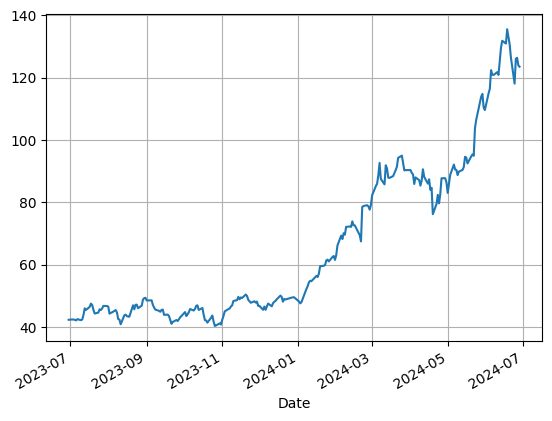

In [59]:
nvda_prices['Close'].plot(grid=True);

In [60]:
nvda_prices.sort_index(ascending=False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-28,124.580002,127.709999,122.750000,123.540001,123.540001,314945500
2024-06-27,124.099998,126.410004,122.919998,123.989998,123.989998,252571700
2024-06-26,126.129997,128.119995,122.599998,126.400002,126.400002,362975900
2024-06-25,121.199997,126.500000,119.320000,126.089996,126.089996,425787500
2024-06-24,123.239998,124.459999,118.040001,118.110001,118.110001,476060900
...,...,...,...,...,...,...
2023-07-07,42.321999,43.214001,42.180000,42.502998,42.490276,355881000
2023-07-06,41.844002,42.179001,41.346001,42.103001,42.090397,303582000
2023-07-05,42.134998,43.176998,42.084999,42.317001,42.304337,323618000


In [61]:
nvda_prices.nlargest(columns=['Close'], n=5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-18,131.139999,136.330002,130.690002,135.580002,135.580002,294335100
2024-06-14,129.960007,132.839996,128.320007,131.880005,131.880005,309320400
2024-06-17,132.990005,133.729996,129.580002,130.979996,130.979996,288504400
2024-06-20,139.800003,140.759995,129.520004,130.779999,130.779999,517768400
2024-06-13,129.389999,129.800003,127.160004,129.610001,129.610001,260704500


In [62]:
nvda_prices.nsmallest(columns=['Close'], n=5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-26,41.853001,42.256001,39.880001,40.326000,40.317253,541001000
2023-10-27,41.130001,41.206001,40.014999,40.500000,40.491215,416784000
2023-10-31,40.450001,40.879002,39.230000,40.779999,40.771152,517969000
2023-08-11,41.750999,42.018002,40.639000,40.855000,40.842773,533085000
2023-09-21,41.583000,42.099998,40.980000,41.016998,41.008102,450736000


## Data Filtering and Selection

In [63]:
fifa_file = Path.cwd() / 'data' / 'fifa_players_22.csv'
players = pd.read_csv(fifa_file, low_memory=False)
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [64]:
# Note pandas does the best job it can to get the data type for the field right
print(f"Player age column type: {players['age'].dtype}")
print(f"Player name column type: {players['short_name'].dtype}")   # object is default for string
print(f"Player gk rating column type: {players['gk'].dtype}")      # this isn't exactly what we want

Player age column type: int64
Player name column type: object
Player gk rating column type: object


In [65]:
columns_to_select= ['short_name', 'overall', 'nationality_name', 'player_positions', 'age', 'preferred_foot', 'club_name', 'gk']
players[columns_to_select].head(10)

,short_name,overall,nationality_name,player_positions,age,preferred_foot,club_name,gk
0,L. Messi,93,Argentina,"RW, ST, CF",34,Left,Paris Saint-Germain,19+3
1,R. Lewandowski,92,Poland,ST,32,Right,FC Bayern München,19+3
2,Cristiano Ronaldo,91,Portugal,"ST, LW",36,Right,Manchester United,20+3
3,Neymar Jr,91,Brazil,"LW, CAM",29,Right,Paris Saint-Germain,20+3
4,K. De Bruyne,91,Belgium,"CM, CAM",30,Right,Manchester City,21+3
5,J. Oblak,91,Slovenia,GK,28,Right,Atlético de Madrid,89+3
6,K. Mbappé,91,France,"ST, LW",22,Right,Paris Saint-Germain,18+3
7,M. Neuer,90,Germany,GK,35,Right,FC Bayern München,88+2
8,M. ter Stegen,90,Germany,GK,29,Right,FC Barcelona,88+3
9,H. Kane,90,England,ST,27,Right,Tottenham Hotspur,20+3


In [66]:
# Lets see if we can filter thisd donw a little bit, since strikers get all the glory
center_backs_only = players['player_positions'] == 'CB'
players[center_backs_only][columns_to_select].head(10)

,short_name,overall,nationality_name,player_positions,age,preferred_foot,club_name,gk
15,V. van Dijk,89,Netherlands,CB,29,Right,Liverpool,20+3
22,Sergio Ramos,88,Spain,CB,35,Right,Paris Saint-Germain,18+3
46,Rúben Dias,87,Portugal,CB,24,Right,Manchester City,17+3
47,G. Chiellini,86,Italy,CB,36,Left,Juventus,12+3
49,M. Hummels,86,Germany,CB,32,Right,Borussia Dortmund,17+3
56,K. Koulibaly,86,Senegal,CB,30,Right,Napoli,17+3
57,R. Varane,86,France,CB,28,Right,Manchester United,18+3
63,A. Laporte,86,Spain,CB,27,Left,Manchester City,18+3
68,M. Škriniar,86,Slovakia,CB,26,Right,Inter,19+3
71,Thiago Silva,85,Brazil,CB,36,Right,Chelsea,18+3


In [69]:
center_backs_only = (players['player_positions'] == 'CB')
right_backs_only = players['player_positions'] == 'RB'
left_backs_only = players['player_positions'] == 'LB'

In [72]:
left_backs_only

0        False
1        False
2        False
3        False
4        False
         ...  
19234    False
19235    False
19236    False
19237    False
19238    False
Name: player_positions, Length: 19239, dtype: bool

In [71]:
players[(players['player_positions'] == 'CB') | right_backs_only | left_backs_only ][columns_to_select].head(10)

,short_name,overall,nationality_name,player_positions,age,preferred_foot,club_name,gk
15,V. van Dijk,89,Netherlands,CB,29,Right,Liverpool,20+3
22,Sergio Ramos,88,Spain,CB,35,Right,Paris Saint-Germain,18+3
42,A. Robertson,87,Scotland,LB,27,Left,Liverpool,18+3
44,T. Alexander-Arnold,87,England,RB,22,Right,Liverpool,19+3
46,Rúben Dias,87,Portugal,CB,24,Right,Manchester City,17+3
47,G. Chiellini,86,Italy,CB,36,Left,Juventus,12+3
49,M. Hummels,86,Germany,CB,32,Right,Borussia Dortmund,17+3
56,K. Koulibaly,86,Senegal,CB,30,Right,Napoli,17+3
57,R. Varane,86,France,CB,28,Right,Manchester United,18+3
63,A. Laporte,86,Spain,CB,27,Left,Manchester City,18+3


This is shows some of the power of boolean indexing in pandas, we create a boolean index and can combine those indices using additional boolean logic to build complicated expressions.  There is a problem though with some of this position data.  Some players play multiple positions see Messi or Neymar Jr.  If we wanted to focus on all the players for a specific position we'd need to include these.  How do we create an expression for that?

In [73]:
cdm_players_mask = players['player_positions'].str.contains('CDM')
cdm_players = players[cdm_players_mask]
cdm_players[columns_to_select].head(10)

,short_name,overall,nationality_name,player_positions,age,preferred_foot,club_name,gk
10,N. Kanté,90,France,"CDM, CM",30,Right,Chelsea,20+3
14,Casemiro,89,Brazil,CDM,29,Right,Real Madrid CF,21+3
19,J. Kimmich,89,Germany,"CDM, RB",26,Right,FC Bayern München,21+3
39,Marquinhos,87,Brazil,"CB, CDM",27,Right,Paris Saint-Germain,18+3
40,L. Goretzka,87,Germany,"CM, CDM",26,Right,FC Bayern München,19+3
43,F. de Jong,87,Netherlands,"CM, CDM, CB",24,Right,FC Barcelona,18+3
51,Thiago,86,Spain,"CM, CDM",30,Right,Liverpool,18+3
52,Sergio Busquets,86,Spain,"CDM, CM",32,Right,FC Barcelona,17+3
61,Fabinho,86,Brazil,"CDM, CB",27,Right,Liverpool,18+3
67,Rodri,86,Spain,CDM,25,Right,Manchester City,18+3


In [74]:
# What if we only want the younger players say <= 25
max_age = 25
young_cdm_players = players[cdm_players_mask & (players['age'] <= max_age)]
young_cdm_players[columns_to_select].head()

,short_name,overall,nationality_name,player_positions,age,preferred_foot,club_name,gk
43,F. de Jong,87,Netherlands,"CM, CDM, CB",24,Right,FC Barcelona,18+3
67,Rodri,86,Spain,CDM,25,Right,Manchester City,18+3
91,W. Ndidi,85,Nigeria,"CDM, CM",24,Right,Leicester City,20+2
129,Y. Tielemans,84,Belgium,"CM, CDM",24,Right,Leicester City,18+2
136,F. Kessié,84,Côte d'Ivoire,"CDM, CM",24,Right,AC Milan,18+3


In [75]:
assert(players['gk'].str.contains('\\+').all())    # have to use `\\+` for regular expression
gk_rating_data = players['gk'].str.split('+')
np_data = np.array([[int(x), int(y)] for x, y in gk_rating_data.values])
players['gk'] = np_data[:, 0] + np_data[:, 1]

In [76]:
# How about the best outfield player to with the highest GK rating
outfield_player_mask = players['player_positions'] != 'GK'
outfield_players = players[outfield_player_mask]
outfield_players[columns_to_select].sort_values(by=['gk'], ascending=False).head()                                                 

,short_name,overall,nationality_name,player_positions,age,preferred_foot,club_name,gk
23,L. Suárez,88,Uruguay,ST,34,Right,Atlético de Madrid,40
4593,P. Jagielka,70,England,CB,38,Right,Derby County,39
6656,L. Veldwijk,68,South Africa,ST,29,Right,Suwon FC,34
4603,A. Tettey,70,Norway,CDM,35,Right,Rosenborg BK,30
3451,R. Hollingshead,72,United States,"LB, RB, CB",30,Right,FC Dallas,28


## Grouping

In [77]:
grp_by_nation = players.groupby(['nationality_name'])         # NOTE: the [ ] are very important here, must be a list 

In [78]:
len(grp_by_nation) == players[['nationality_name']].nunique()

nationality_name    True
dtype: bool

In [81]:
#grp_by_nation.groups  # (oodles and gobs of nearly unreadable data)

In [82]:
grp_by_nation.size().sort_values(ascending=False).head(10)

nationality_name
England          1719
Germany          1214
Spain            1086
France            980
Argentina         960
Brazil            897
Japan             546
Netherlands       439
United States     413
Poland            403
dtype: int64

In [83]:
top_player = grp_by_nation.first()
top_player[['short_name', 'overall', 'player_positions', 'age', 'preferred_foot', 'club_name']].head(10)

,short_name,overall,player_positions,age,preferred_foot,club_name
nationality_name,,,,,,
Afghanistan,O. Haydary,64,RM,23,Right,Lechia Gdańsk
Albania,T. Strakosha,80,GK,26,Right,Lazio
Algeria,R. Mahrez,86,"RW, RM",30,Left,Manchester City
Andorra,Marc Vales,64,CB,31,Right,Sandefjord Fotball
Angola,Clinton Mata,78,"RB, CB",28,Right,Club Brugge KV
Antigua and Barbuda,M. Romeo,70,"RWB, RB",25,Right,Portsmouth
Argentina,L. Messi,93,"RW, ST, CF",34,Left,Paris Saint-Germain
Armenia,H. Mkhitaryan,83,"CF, RM, RW",32,Right,Roma
Australia,A. Mooy,77,"CM, CAM",30,Right,Shanghai Port FC


In [84]:
# What about the 5th best player for their naition
nth_player = grp_by_nation.nth(5)
nth_player[columns_to_select].head(10)

,short_name,overall,nationality_name,player_positions,age,preferred_foot,club_name,gk
40,L. Goretzka,87,Germany,"CM, CDM",26,Right,FC Bayern München,22
57,R. Varane,86,France,CB,28,Right,Manchester United,21
59,Gerard Moreno,86,Spain,"ST, RM, RW",29,Left,Villarreal CF,22
61,Fabinho,86,Brazil,"CDM, CB",27,Right,Liverpool,21
76,L. Bonucci,85,Italy,CB,34,Right,Juventus,14
80,K. Walker,85,England,RB,31,Right,Manchester City,22
93,L. Martínez,85,Argentina,ST,23,Right,Inter,22
100,D. Mertens,84,Belgium,"CF, ST, CAM",34,Right,Napoli,19
101,G. Wijnaldum,84,Netherlands,"CM, CDM",30,Right,Paris Saint-Germain,22
124,R. Guerreiro,84,Portugal,"LB, LM",27,Left,Borussia Dortmund,21


In [89]:
nation = 'Georgia'
nat_players = grp_by_nation.get_group((nation,))
nat_players[columns_to_select].head(10)

,short_name,overall,nationality_name,player_positions,age,preferred_foot,club_name,gk
1555,G. Makaridze,75,Georgia,GK,31,Right,Unión Deportiva Almería,75
1966,G. Mamardashvili,75,Georgia,GK,20,Left,Valencia CF,76
3306,Vako,72,Georgia,"LM, CAM",28,Right,Ulsan Hyundai FC,18
3674,G. Kvilitaia,72,Georgia,ST,27,Right,APOEL Nicosia FC,18
3712,S. Lobjanidze,72,Georgia,"RW, LW",26,Right,Atakaş Hatayspor,18
3756,O. Kiteishvili,72,Georgia,"CAM, LM, CM",25,Right,SK Sturm Graz,19
4436,D. Khocholava,71,Georgia,CB,28,Right,F.C. København,16
4919,T. Okriashvili,70,Georgia,"CAM, LM",29,Right,APOEL Nicosia FC,18
6163,G. Chakvetadze,69,Georgia,"CAM, LM, CM",21,Right,KAA Gent,17
6200,G. Kharaishvili,69,Georgia,CAM,24,Right,Ferencvárosi TC,17


## Multi-Indexing


In [92]:
multi_grp = players.groupby(['player_positions', 'nationality_name'])       
multi_grp.count()['sofifa_id']

player_positions  nationality_name
CAM               Argentina           8
                  Australia           9
                  Austria             3
                  Belarus             1
                  Belgium             4
                                     ..
ST, RW, LW        Zambia              1
ST, RW, RM        Armenia             1
                  Ghana               1
                  Senegal             1
                  Venezuela           1
Name: sofifa_id, Length: 5587, dtype: int64

In [ ]:
multi_grp.get_group(('CDM', :)) 

## Merging, Joining and Contatenating (OH MY....)

In [ ]:
24*2*30